# 🎵 Music Genre Classification

## 📌 Objective
Classify audio tracks into their respective music genres using extracted audio features or spectrogram images. This project demonstrates both tabular and image-based approaches for solving a multi-class classification problem.

---

## 📂 Dataset
- **Name:** GTZAN Genre Collection
- **Source:** [GTZAN on Kaggle](https://www.kaggle.com/datasets/andradaolteanu/gtzan-dataset-music-genre-classification)
- **Classes:** 10 genres (blues, classical, country, disco, hiphop, jazz, metal, pop, reggae, rock)

---

## ⚙️ Workflow Summary

### 🧹 1. Data Preprocessing
- Extracted features from `.wav` files using:
  - **MFCCs** (Mel Frequency Cepstral Coefficients)
  - **Chroma**, **Spectral Contrast**, and **Zero Crossing Rate**
- For image-based approach:
  - Converted audio files to **Mel Spectrograms**
  - Saved as `.png` images for CNN input

---

### 🧠 2. Model Approaches

#### A. Tabular Approach (using MFCC features):
- **Models:** Logistic Regression, Random Forest, XGBoost, etc.
- **Libraries:** Scikit-learn
- **Metrics:** Accuracy, Confusion Matrix, Classification Report

#### B. Image-based Approach (using spectrograms):
- **Model:** Convolutional Neural Network (CNN)
- **Libraries:** TensorFlow/Keras
- **Input:** Spectrogram images resized and normalized
- **Metrics:** Accuracy, ROC-AUC, F1-score

---

### 💡 Bonus: Transfer Learning
- Utilized **pre-trained models** like **ResNet50** and **VGG16** (ImageNet weights)
- Fine-tuned final layers for multi-class classification on spectrogram images

---

## 📊 Visualizations
- Waveforms and Spectrogram Plots
- Confusion Matrix
- ROC Curve per class
- Feature Importance (for tabular models)

---

## 🛠️ Tools & Libraries
- Python
- Librosa (feature extraction)
- NumPy / Pandas / Matplotlib / Seaborn
- Scikit-learn
- TensorFlow / Keras
- OpenCV / PIL

---

## 📈 Results
- Compared tabular vs. image-based models
- Transfer learning significantly improved performance on spectrograms
- Image-based CNNs outperformed traditional tabular models in most cases

---

## 🔚 Conclusion
This project successfully demonstrates that both audio features and visual representations (spectrograms) can be used to classify music genres. Deep learning models, especially CNNs with transfer learning, show promising results in understanding audio patterns.


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("andradaolteanu/gtzan-dataset-music-genre-classification")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/gtzan-dataset-music-genre-classification


In [3]:
# 🎵 Music Genre Classification with GTZAN Dataset

# =========================
# 📦 1. IMPORT LIBRARIES
# =========================
import os
import numpy as np
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2


2025-08-07 18:17:10.580039: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754590630.839393      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754590630.911901      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [6]:

# =========================
# 📁 2. LOAD AUDIO FILES
# =========================
import os
import librosa
import numpy as np
import pandas as pd

audio_dir = "/kaggle/input/gtzan-dataset-music-genre-classification/Data/genres_original"
labels = []
features = []
genres = os.listdir(audio_dir)

for genre in genres:
    genre_dir = os.path.join(audio_dir, genre)
    if not os.path.isdir(genre_dir):
        continue
    for file in os.listdir(genre_dir):
        if file.endswith(".wav"):
            file_path = os.path.join(genre_dir, file)
            try:
                y, sr = librosa.load(file_path, duration=30)
                mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
                mfcc_mean = np.mean(mfcc.T, axis=0)
                features.append(mfcc_mean)
                labels.append(genre)
            except Exception as e:
                print(f"⚠️ Skipping file {file_path}: {e}")

X = np.array(features)
y = pd.factorize(labels)[0]


/tmp/ipykernel_36/3561539843.py:22: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, duration=30)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


⚠️ Skipping file /kaggle/input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00054.wav: 


/tmp/ipykernel_36/3561539843.py:31: FutureWarning: factorize with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  y = pd.factorize(labels)[0]


In [7]:
# =========================
# ✂️ 3. TRAIN-TEST SPLIT
# =========================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# =========================
# 🌳 4. RANDOM FOREST
# =========================
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.55      0.49        20
           1       0.61      0.85      0.71        20
           2       0.75      0.60      0.67        20
           3       0.91      0.50      0.65        20
           4       0.62      0.40      0.48        20
           5       0.79      0.95      0.86        20
           6       0.61      0.70      0.65        20
           7       0.42      0.50      0.45        20
           8       0.67      0.50      0.57        20
           9       0.71      0.75      0.73        20

    accuracy                           0.63       200
   macro avg       0.65      0.63      0.63       200
weighted avg       0.65      0.63      0.63       200



In [9]:

# =========================
# 🖼️ 5. SPECTROGRAM CREATION
# =========================
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

spec_dir = "./spectrograms"
os.makedirs(spec_dir, exist_ok=True)

for genre in genres:
    genre_path = os.path.join(audio_dir, genre)
    out_path = os.path.join(spec_dir, genre)
    os.makedirs(out_path, exist_ok=True)

    for file in os.listdir(genre_path):
        if file.endswith(".wav"):
            file_path = os.path.join(genre_path, file)
            try:
                y, sr = librosa.load(file_path, duration=30)
                S = librosa.feature.melspectrogram(y=y, sr=sr) 
                S_DB = librosa.power_to_db(S, ref=np.max)

                plt.figure(figsize=(2, 2))
                librosa.display.specshow(S_DB, sr=sr, cmap='gray_r')
                plt.axis('off')
                plt.tight_layout()
                
                save_path = os.path.join(out_path, file.replace(".wav", ".png"))
                plt.savefig(save_path, bbox_inches='tight', pad_inches=0)
                plt.close()
            except Exception as e:
                print(f"⚠️ Skipping file {file_path}: {e}")



/tmp/ipykernel_36/3948882072.py:25: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, duration=30)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


⚠️ Skipping file /kaggle/input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00054.wav: 


In [10]:
# =========================
# 📷 6. LOAD IMAGE DATA FOR CNN
# =========================
img_size = 128
image_data = []
image_labels = []

for genre in genres:
    genre_path = os.path.join(spec_dir, genre)
    for file in os.listdir(genre_path):
        if file.endswith(".png"):
            img_path = os.path.join(genre_path, file)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (img_size, img_size))
            image_data.append(img)
            image_labels.append(genre)

X_img = np.array(image_data) / 255.0
X_img = X_img.reshape(-1, img_size, img_size, 1)
y_img = pd.factorize(image_labels)[0]
y_img_cat = to_categorical(y_img)

X_train_img, X_test_img, y_train_img, y_test_img = train_test_split(X_img, y_img_cat, test_size=0.2, random_state=42, stratify=y_img)



/tmp/ipykernel_36/3715155025.py:20: FutureWarning: factorize with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  y_img = pd.factorize(image_labels)[0]


In [11]:
# =========================
# 🧠 7. CNN MODEL
# =========================
cnn = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_size, img_size, 1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(genres), activation='softmax')
])

cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn.fit(X_train_img, y_train_img, validation_data=(X_test_img, y_test_img), epochs=10, batch_size=32)



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-08-07 18:40:49.395500: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 14s 455ms/step - accuracy: 0.1093 - loss: 3.0712 - val_accuracy: 0.1100 - val_loss: 2.3008
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 471ms/step - accuracy: 0.1438 - loss: 2.2959 - val_accuracy: 0.1600 - val_loss: 2.2814
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 20s 445ms/step - accuracy: 0.1309 - loss: 2.2775 - val_accuracy: 0.2650 - val_loss: 2.2727
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 486ms/step - accuracy: 0.2227 - loss: 2.2244 - val_accuracy: 0.2400 - val_loss: 2.1398
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 421ms/step - accuracy: 0.2864 - loss: 2.0855 - val_accuracy: 0.2700 - val_loss: 1.9785
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 444ms/step - accuracy: 0.2922 - loss: 2.0208 - val_accuracy: 0.3000 - val_loss: 1.8832
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 459ms/step - accuracy: 0.3708 - loss: 1.8076 - val_accuracy: 0.4050 - val_loss: 1.7204
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 432ms/step - accuracy: 0.3570 - loss: 1.7137 - val_accu

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step

CNN Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.05      0.10        20
           1       0.90      0.90      0.90        20
           2       0.33      0.50      0.40        20
           3       0.35      0.60      0.44        20
           4       0.25      0.10      0.14        20
           5       0.72      0.65      0.68        20
           6       0.33      0.55      0.42        20
           7       0.47      0.75      0.58        20
           8       0.43      0.15      0.22        20
           9       0.76      0.65      0.70        20

    accuracy                           0.49       200
   macro avg       0.56      0.49      0.46       200
weighted avg       0.56      0.49      0.46       200



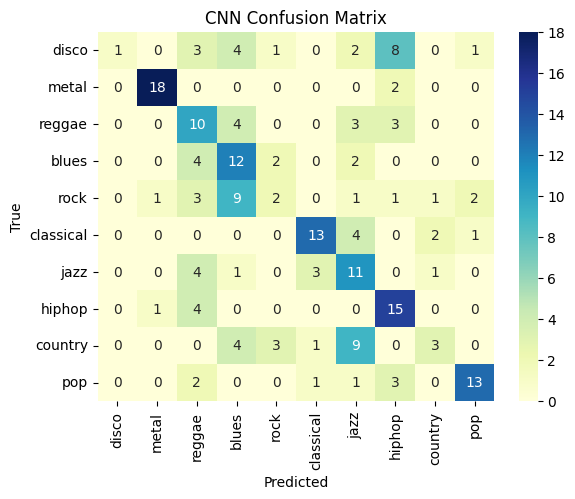

In [12]:
# =========================
# 📈 8. EVALUATION
# =========================
y_pred_cnn = cnn.predict(X_test_img)
y_pred_labels = np.argmax(y_pred_cnn, axis=1)
y_true_labels = np.argmax(y_test_img, axis=1)

print("\nCNN Classification Report:")
print(classification_report(y_true_labels, y_pred_labels))

cm = confusion_matrix(y_true_labels, y_pred_labels)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=genres, yticklabels=genres, cmap="YlGnBu")
plt.title("CNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
